## edit mode and command mode ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#read the excel file
data=pd.read_excel("C:\\Users\\Yuvraj Singh Rathore\\ibmofferletter\\health_care_diabetes.xlsx")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies: This column indicates the number of times a woman has been pregnant.

Glucose: Referring to the blood sugar levels measured through a glucose test, this column holds data related to the glucose concentration in the blood.

BloodPressure: Representing the blood pressure measurement, this column contains values reflecting the pressure within the circulatory system.

SkinThickness: This column records the measurement of skin thickness, which might be a parameter related to health or body composition.

Insulin: Denoting the insulin level, this column contains data regarding the insulin concentration in the blood.

BMI (Body Mass Index): This column holds values calculated from a person's weight and height, serving as an indicator of body fatness and potential health risks associated with it.

DiabetesPedigreeFunction: This column contains a numerical value describing the likelihood of diabetes based on family history or genetic influence.

Age: Reflecting the age of the individuals in the dataset, this column records their ages at the time of data collection.

Outcome: This column denotes a binary outcome or label (commonly 0 or 1) indicating whether an individual shows signs of diabetes based on certain criteria or tests.

In [3]:
data.shape


(768, 9)

The output data.shape representing (768, 9) signifies that the DataFrame 'data' contains 768 rows and 9 columns. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


75th percentile in a dataset, it means that 75% of the data points fall below that particular value. So, if the 75th percentile of a dataset is, for example, 50, it indicates that 75% of the data points in that dataset are less than or equal to 50.

Pregnancies:

Most women in the dataset have had pregnancies, with an average of about 4.
However, some women have had none, while a few have had as many as 17 pregnancies, indicating a wide range of experiences.
Glucose:

The average glucose level is around 121 mg/dL, an important indicator in diabetes.
Some readings are as low as 0, potentially indicating missing or invalid data, while the highest recorded level is 199 mg/dL.
BloodPressure:

The average blood pressure is approximately 69 mm Hg.
There are records showing a blood pressure of 0, which might need further investigation, and the highest recorded pressure is 122 mm Hg.
SkinThickness:

On average, individuals have a skin thickness of around 21 units.
Some records show a skin thickness of 0, suggesting potential missing or incomplete data. The highest recorded thickness is 99 units.
Insulin:

The average insulin level is about 80 units.
There are instances of 0 insulin units recorded, which might indicate missing or incomplete data. The highest recorded level is 846 units.
BMI (Body Mass Index):

The average BMI is approximately 32, indicating a tendency toward higher body fat.
Some individuals have a BMI of 0, possibly indicating missing or inaccurate data. The highest recorded BMI is 67.1.
DiabetesPedigreeFunction:

The average diabetes pedigree function value is around 0.47, indicating a moderate genetic likelihood of diabetes.
The values range from 0.078 to 2.42, showcasing a varied genetic predisposition within the dataset.
Age:

The average age of individuals in the dataset is about 33 years.
The ages range from 21 to 81 years, demonstrating a broad spectrum of age groups.
Outcome:

Around 35% of individuals in the dataset exhibit signs of diabetes (value of 1).
The dataset is slightly skewed towards individuals without diabetes, as the 75th percentile indicates a value of 0 (no signs of diabetes) for 75% of the dataset.

### Data Preprocessing :Treating Missing Values"
#### In this dataset missing values represented by 0, so replace by  the mean of their feature columns.

In [6]:
#Finding number of having null values in a row
#data[i][data[i] != 0] =>[data[i] != 0] this is condtion return true or false and data[i] will take that values that has value true
for i in data.columns:
    print(i,(data[i]==0).sum())
           

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


**Pregnancies**: It's plausible to have zero pregnancies. This doesn't necessarily require changing. 

**Glucose**: Having zero glucose levels is improbable. so changing these values.

**BloodPressure**: Having zero blood pressure is unlikely and should be reviewed for correction.

**SkinThickness**: Zero skin thickness isn't realistic. These values may need to be modified.

**Insulin**: Zero insulin levels are improbable. we might need to address these values.

**BMI**: Having zero BMI is unrealistic. These values need attention.

**DiabetesPedigreeFunction and Age**: These columns have no rows with a value of zero, so they don't require any 
changes in this regard.

**Outcome**: Assuming this column represents diabetes (binary, possibly 0 for non-diabetic and 1 for diabetic), having 0 might be valid depending on the context.

now making list of these columns which have to be changed and replacing 0 by mean of the column

In [7]:
#making list of columns which contain null values or 0
change_col=[]
for i in data.columns:
    if (data[i]==0).sum()!=0:
        change_col.append(i)
#pregnancies,outcome can be 0 so removing these two
no_change=["Pregnancies","Outcome"]
for i in no_change:
    change_col.remove(i)
change_col

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
#finding the null value percentage 
null_percentage=(data[change_col]==0).mean()*100
null_percentage

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

(data[glucose]==0): This creates a boolean mask where each element in the 'glucose' column is checked for equality with 0. It will result in a series of True or False values.
(data[glucose]==0).mean(): This calculates the mean of the boolean values, treating True as 1 and False as 0. This effectively computes the proportion of occurrences where 'glucose' equals 0, which represents the proportion of True values in the boolean series.
* 100: Finally, multiplying by 100 converts this proportion to a percentage.
So, the expression (data[glucose]==0).mean()*100 would give you the percentage of rows in the 'glucose' column where the value is 0 in your dataset.

so glucose contain 0.6 percentage of rows as null values

Glucose: The 'Glucose' column contains approximately 65.10% null values.

BloodPressure: The 'BloodPressure' column contains approximately 4.56% null values
.
SkinThickness: The 'SkinThickness' column contains approximately 29.56% null value
s.
Insulin: The 'Insulin' column contains approximately 48.70% null valu
es.
BMI: The 'BMI' column contains approximately 1.43% null values.

In [9]:
#replacing 0 with the mean values of the columns
for i in change_col:
   data[i]=data[i].replace([0],data[i].mean())
#can also use interpolate method also 


In [10]:

null_percentages = data.isnull().mean() * 100
null_percentages


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

NOW THE DATA IS CLEAN FROM NULL VALUES

## Detecting outlier and treatment 

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


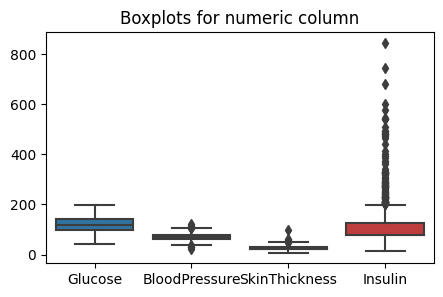

In [91]:
selected_col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
#columns=data[change_col]
columns=data[selected_col]

plt.figure(figsize=(5,3))
sns.boxplot(data=columns)
plt.title("Boxplots for numeric column")
plt.show()

#### BOXPLOT/whisker plot => USED FOR VISUALIZING THE OUTLIERS
IQR =>INTER QUATARILE RANGE LENGTH OF THE BOX TOP-DOWN
q1=>quantile 1 - 25th percentile 
q3=>quantile 1 - 75th percentile 
lower bound => lower whisker line 
data[condition] => filtering(extraction few rows from dataset) 

In [13]:
# Finding the Outlier Count in the selected Columns: 
def find_outliers_iqr(data, column_name):
# Calculate the first quartile (Q1) and third quartile (Q3) 
    Q1 = data[column_name].quantile(0.25) 
    Q3 = data[column_name].quantile(0.75) 
# Calculate the interquartile range (IQR) 
    IQR = Q3 - Q1 
# Define the lower and upper bounds for outliers 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
# Find outliers 
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)] 
# Count the number of outliers 
    count_outliers = len(outliers) 
    return count_outliers 
# Calculate and print the number of outliers for each column of interest 
for column_name in selected_col: 

  outlier_count = find_outliers_iqr(data,column_name) 
  print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


#### Boxplot Analysis for Numerical Columns
the boxplot illustrates the distribution of of our numerical columns:Glucose,Bloodpressure,skinThickness and insulin.THe following inferences can be drawn:
##### Glucose
median glucose level =>200
iqr is large indicating considerable variability in glucose levels.
there are no ouliers

##### Blood Pressure:
median blood pressure :72 mmHg (within normal range)
Iqr is relatively small suggesting more consistent blood pressure levels.
few outliers none extemely high or low

##### Insulin 
=> median insulin level=>79 mlU/L
IQR IS large inidcation consideragble variablitliy in insulin levels
more outliers,many are extremely high

##### Overall Observations
All columns exhiibit a wide range of values with some outliers .Insuling columns has many Outliers.
median values for all columns except the insuling column fall withing the normal range .

##### Additional Inferences
:Glucose level show more variability than blood pressure levels
more outliers in the insulin column compared to blood pressure and skin thickness.

##### Possible interpretations 
variability in glucose levels may be influenced by factors like diet.exercise,and stress
outliers in the insulin may be associated underlying medical conditions or phyiological factors. factors such as dietary habits,genetic or medical treatments contribute to higher insulin levels.
ESSENTIAL to note these inferences are based on a single boxplot and further info is nedded to draw definitive conclusions.
 
## OUTLIER TREATMENT


In [14]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)


Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [15]:
data_cleared_iqr=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
# axis 1 => column axis=>0 row 
#removed values less than lower bound and greater than upper bound
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [16]:
data_cleared_iqr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


### Inferences from Outlier removal using IQR Method
1) **Data size Reduction**:After removing outliers using IQR method the data set reduced to 768 columns to 688 rows.
2) **Outliers Identified**: Outliers were detected and removed across various columns,particularly impacting features like glucose,BLOOD PRESSURE ,SKIN THICKENESS ,INSULIN BMI AND AGE.
3) **Increased Data Robustness**:improving reliability of statistical analyses and modelling.
4) **Preserved Features**:The opereation applied to 9 columns including predictors as well as target variable.
5) **Consideration for Domain Knowledge**:decision to remove outliers should be made with consideration for domain knowledge as outliers may conatin valuable inFORMATION
6)   **FINAL DATASAET STATISTIS**:
DATA SET AFTER OUTLIER REMOVAL =>688 ROWS
DATA SET BEFORE OUTLIER REMOVAL =>768 ROWS


In [17]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]


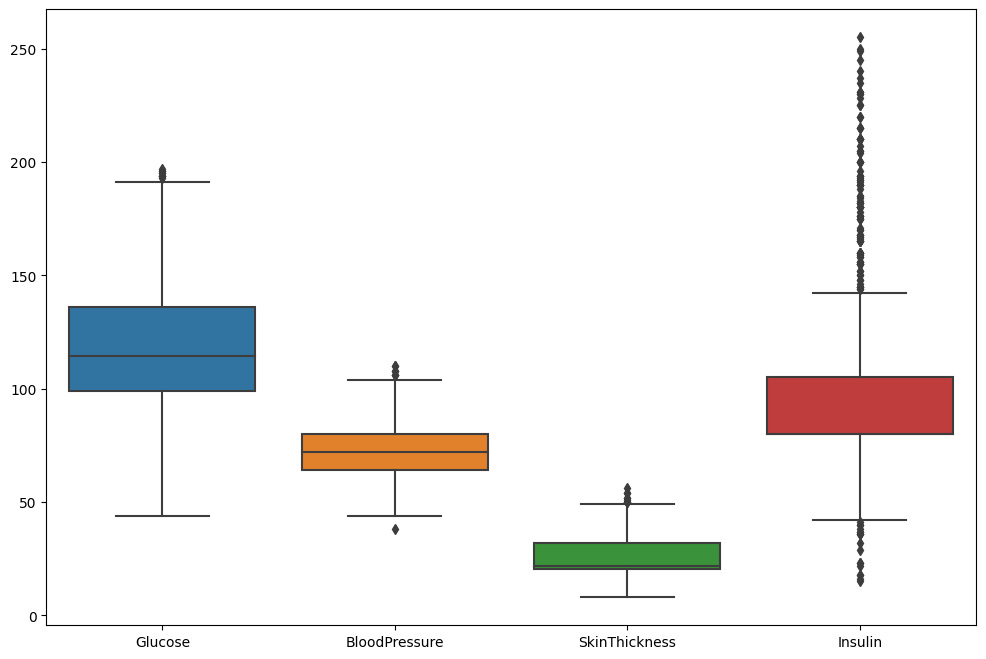

In [18]:
#checking the ouliers after treatment using box plot 
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

**It can be observed that ouliers have been significantly reduced**

## EDA-UNIVARIATE analysis for each feature
eda=>exploratory data analysis
1) univariate analysis ->Histograms(frequency response plot),Countplot
2) bivariate analysis
3) multivariate analysis
#### Visually exploring variables using histograms

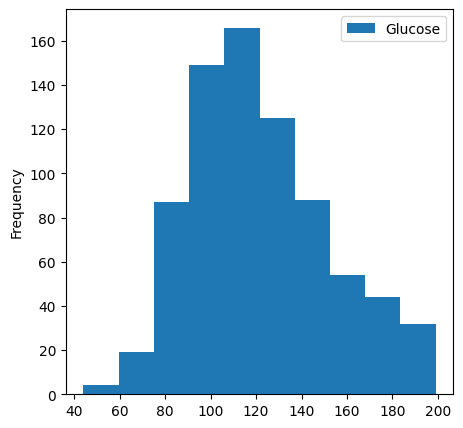

In [92]:
data['Glucose'].plot(kind='hist',figsize=(5,5))
plt.legend()
plt.show()
#starting from 44 to 199
#it take bins by default size bw two values
#tells for specific range how many values are there

### Inference:
The data appears to be normally distributed, with a peak in the middle of the range and with the tails tapering off on either side.
The normal range for blood glucose levels is considered to be between 70 and 110 mg/dL. The data in the image appears to be mostly above this range, suggesting that the people represented in the data may have diabetes.
The data could be used to create a variety of other visualizations, such as a box plot or a scatter plot. These visualizations could provide more information about the distribution of the data, such as the outliers and the range of values.

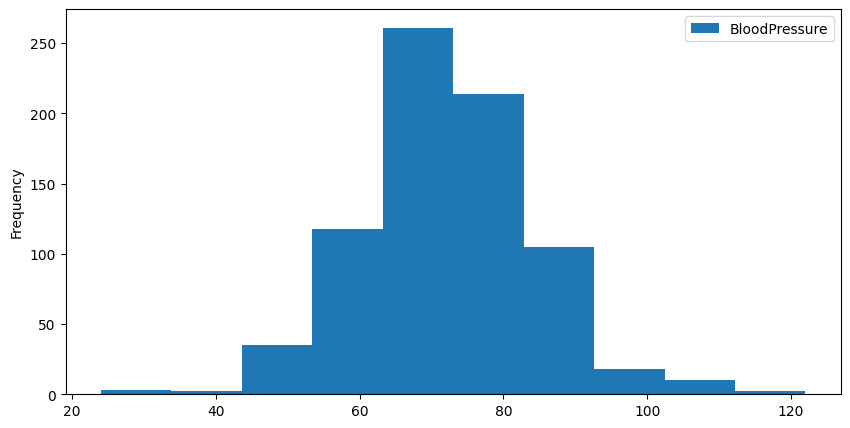

In [20]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

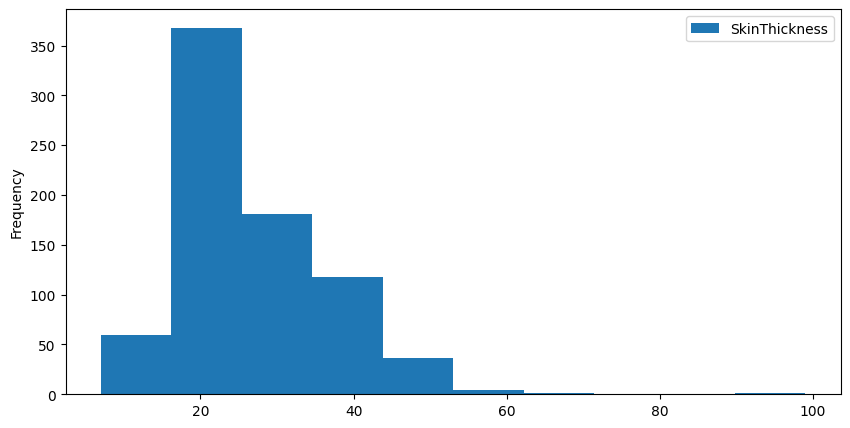

In [21]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

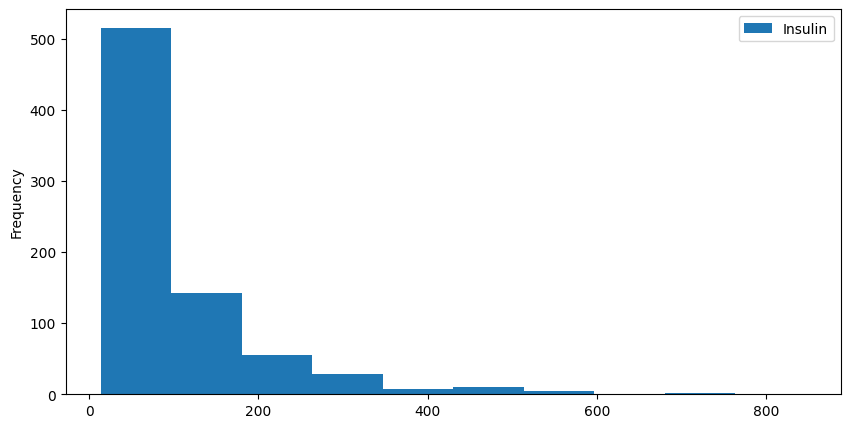

In [22]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

## VIOLIN PLOT

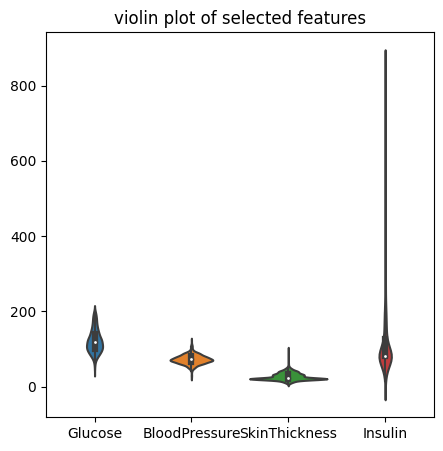

In [94]:
plt.figure(figsize=(5,5))
sns.violinplot(data=data[selected_col])
plt.title("violin plot of selected features")
plt.show()

The violin plot shows the distribution of four numerical features:'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'.The violin shape represents the probability density function (PDF) of each feature and the boxplot embedded within each violin plot shows the median,IQR and outliers.

#### Kernel Density Estimation (KDE) plot for the selected features 

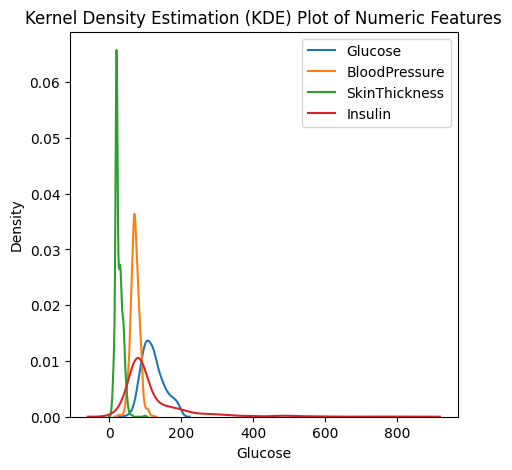

In [93]:
plt.figure(figsize=(5,5))
for column in selected_col:
    sns.kdeplot(data[column],label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

The image shows a kernel Density Estimation(KDE) PLOT of four numerical features:'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'.KDE is a NON-PARAMETRIC METHOD for esitmating the probability density function of a random variable the kde plot shows the estimated pdf of each feature which can be used to visualize the distribution of the data 


##### Creating a count (frequency plot describing ) the data types and the count of variables.

In [25]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [26]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

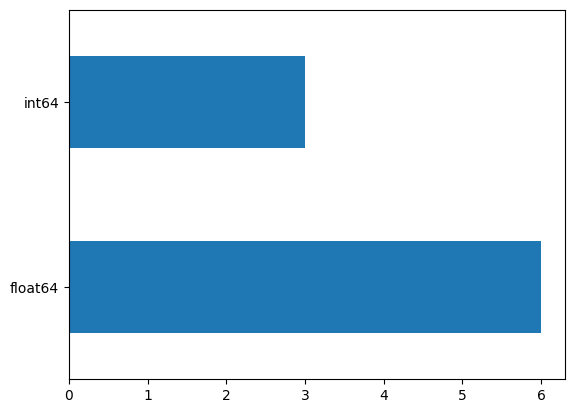

In [27]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.show()

It can be observed that there are 3 features of integer data type and six features of float data type 

## Data Exploration:
#### Check the balance of the data by plotting the count of outcomes by their value.Describe your findings and plan future course of action 

In [28]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

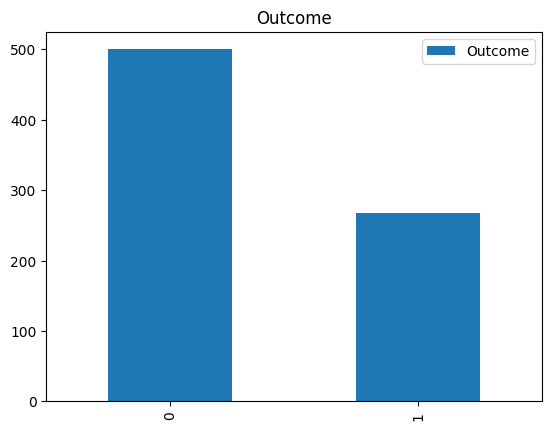

In [29]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [30]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
print(outcome)
data['Outcome'].value_counts(1)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

#### Inferences from Outcome Distribution
**Class Imbalance:**
1) the dataset exhibits class imbalance in the outcome variable
2) class 0(no diabetes) has 500 instances
3) class 1(diabetic) has 268 instances


**Potential impact on modeling:**
1) class imbalances may affect the performance of machine learning models, particularly for binary classification tasks
2) addressing class imbalances through techniques like resampling or using appropriate evaluation metics may be necessary.


**Consideration for predictive models:**

1) models may need to be evaluated and tuned considering the imbalanced distribution to avooid biased predictions toward the majority class

In [31]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

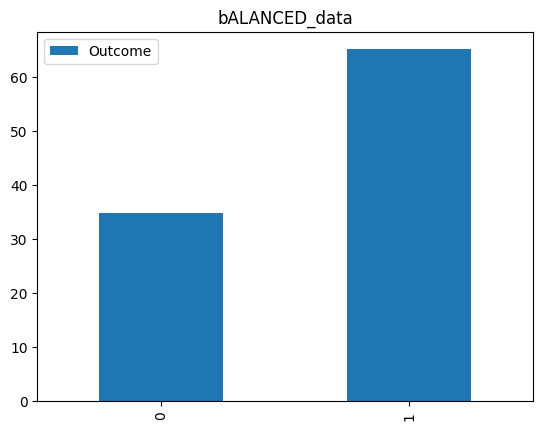

In [32]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('bALANCED_data')
plt.show()

### Findings and plan future course of action.
1) we can see its a imbalance dataset.biased towards class 0 in datasset.this may affect the algo trained as that will also be biased toward same class so we have to balance it.
2) we can use resampling or smote to balance a dataset.

## Bi-Variate analysis
#### creating scatter charts bw the pair of variables to understand relationships.

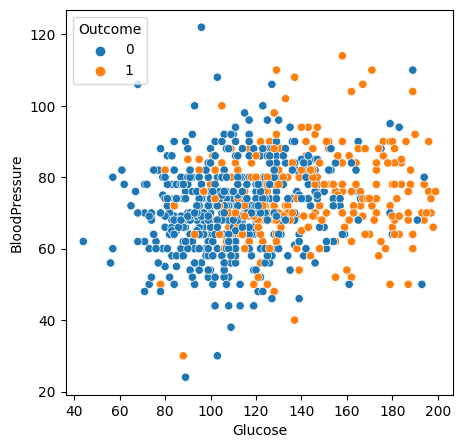

In [95]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

#### iNFERENCES
IF THE GLUCOSE LEVEL INCREASES ABOVE 80 THEN THERE ARE HIGH CHANCES OF HAVING DIABETES

#### iNFERENCES
IF THE GLUCOSE LEVEL INCREASES ABOVE 80 THEN THERE ARE HIGH CHANCES OF HAVING DIABETES

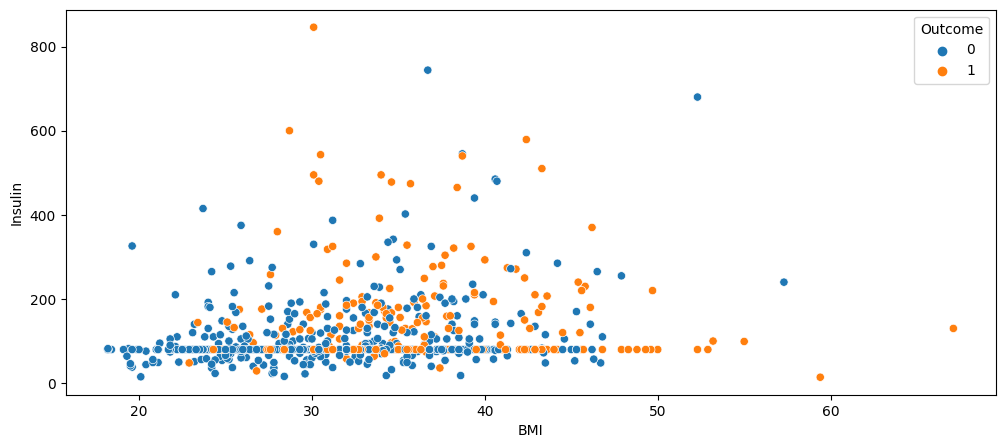

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

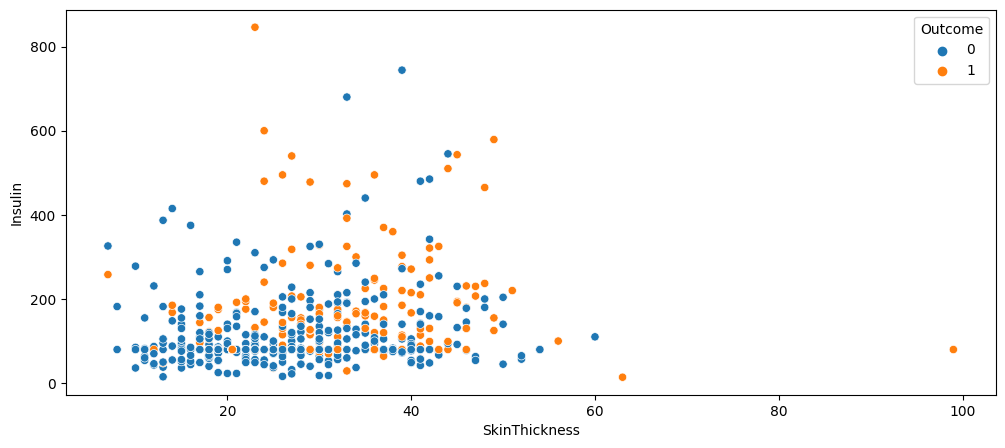

In [35]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

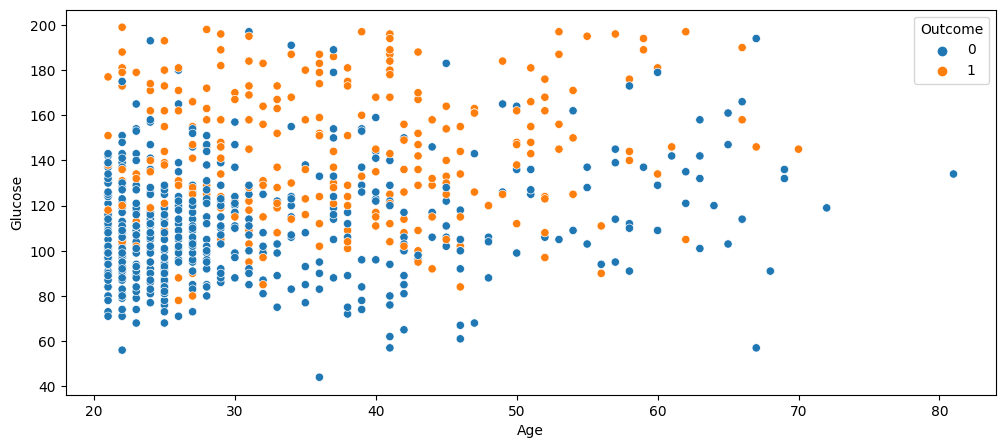

In [36]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

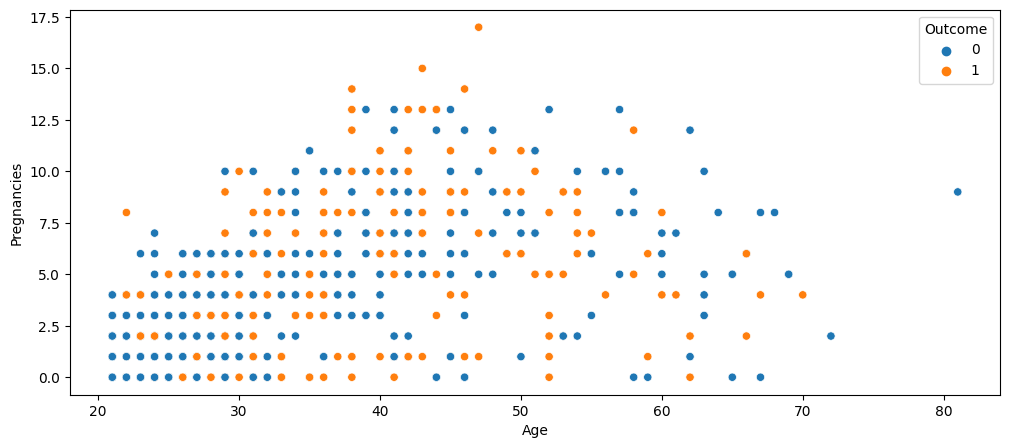

In [37]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

1) WE CAN see pregnanices has highest relation with age feature
2) Also outcome has maximum relation with the Glucose and minimum with blood pressure than the other features.
3) we can see from scatterplot that there is outliers present in this data
4) becasue of outliers our data is skewed to left or right side of which is not acceptable
5) if we want to train a model this poses a problem
6) therefore for better visulization and oulier detection we can use sns.boxplot and remove outliers from the dataset

C:\Users\Yuvraj Singh Rathore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


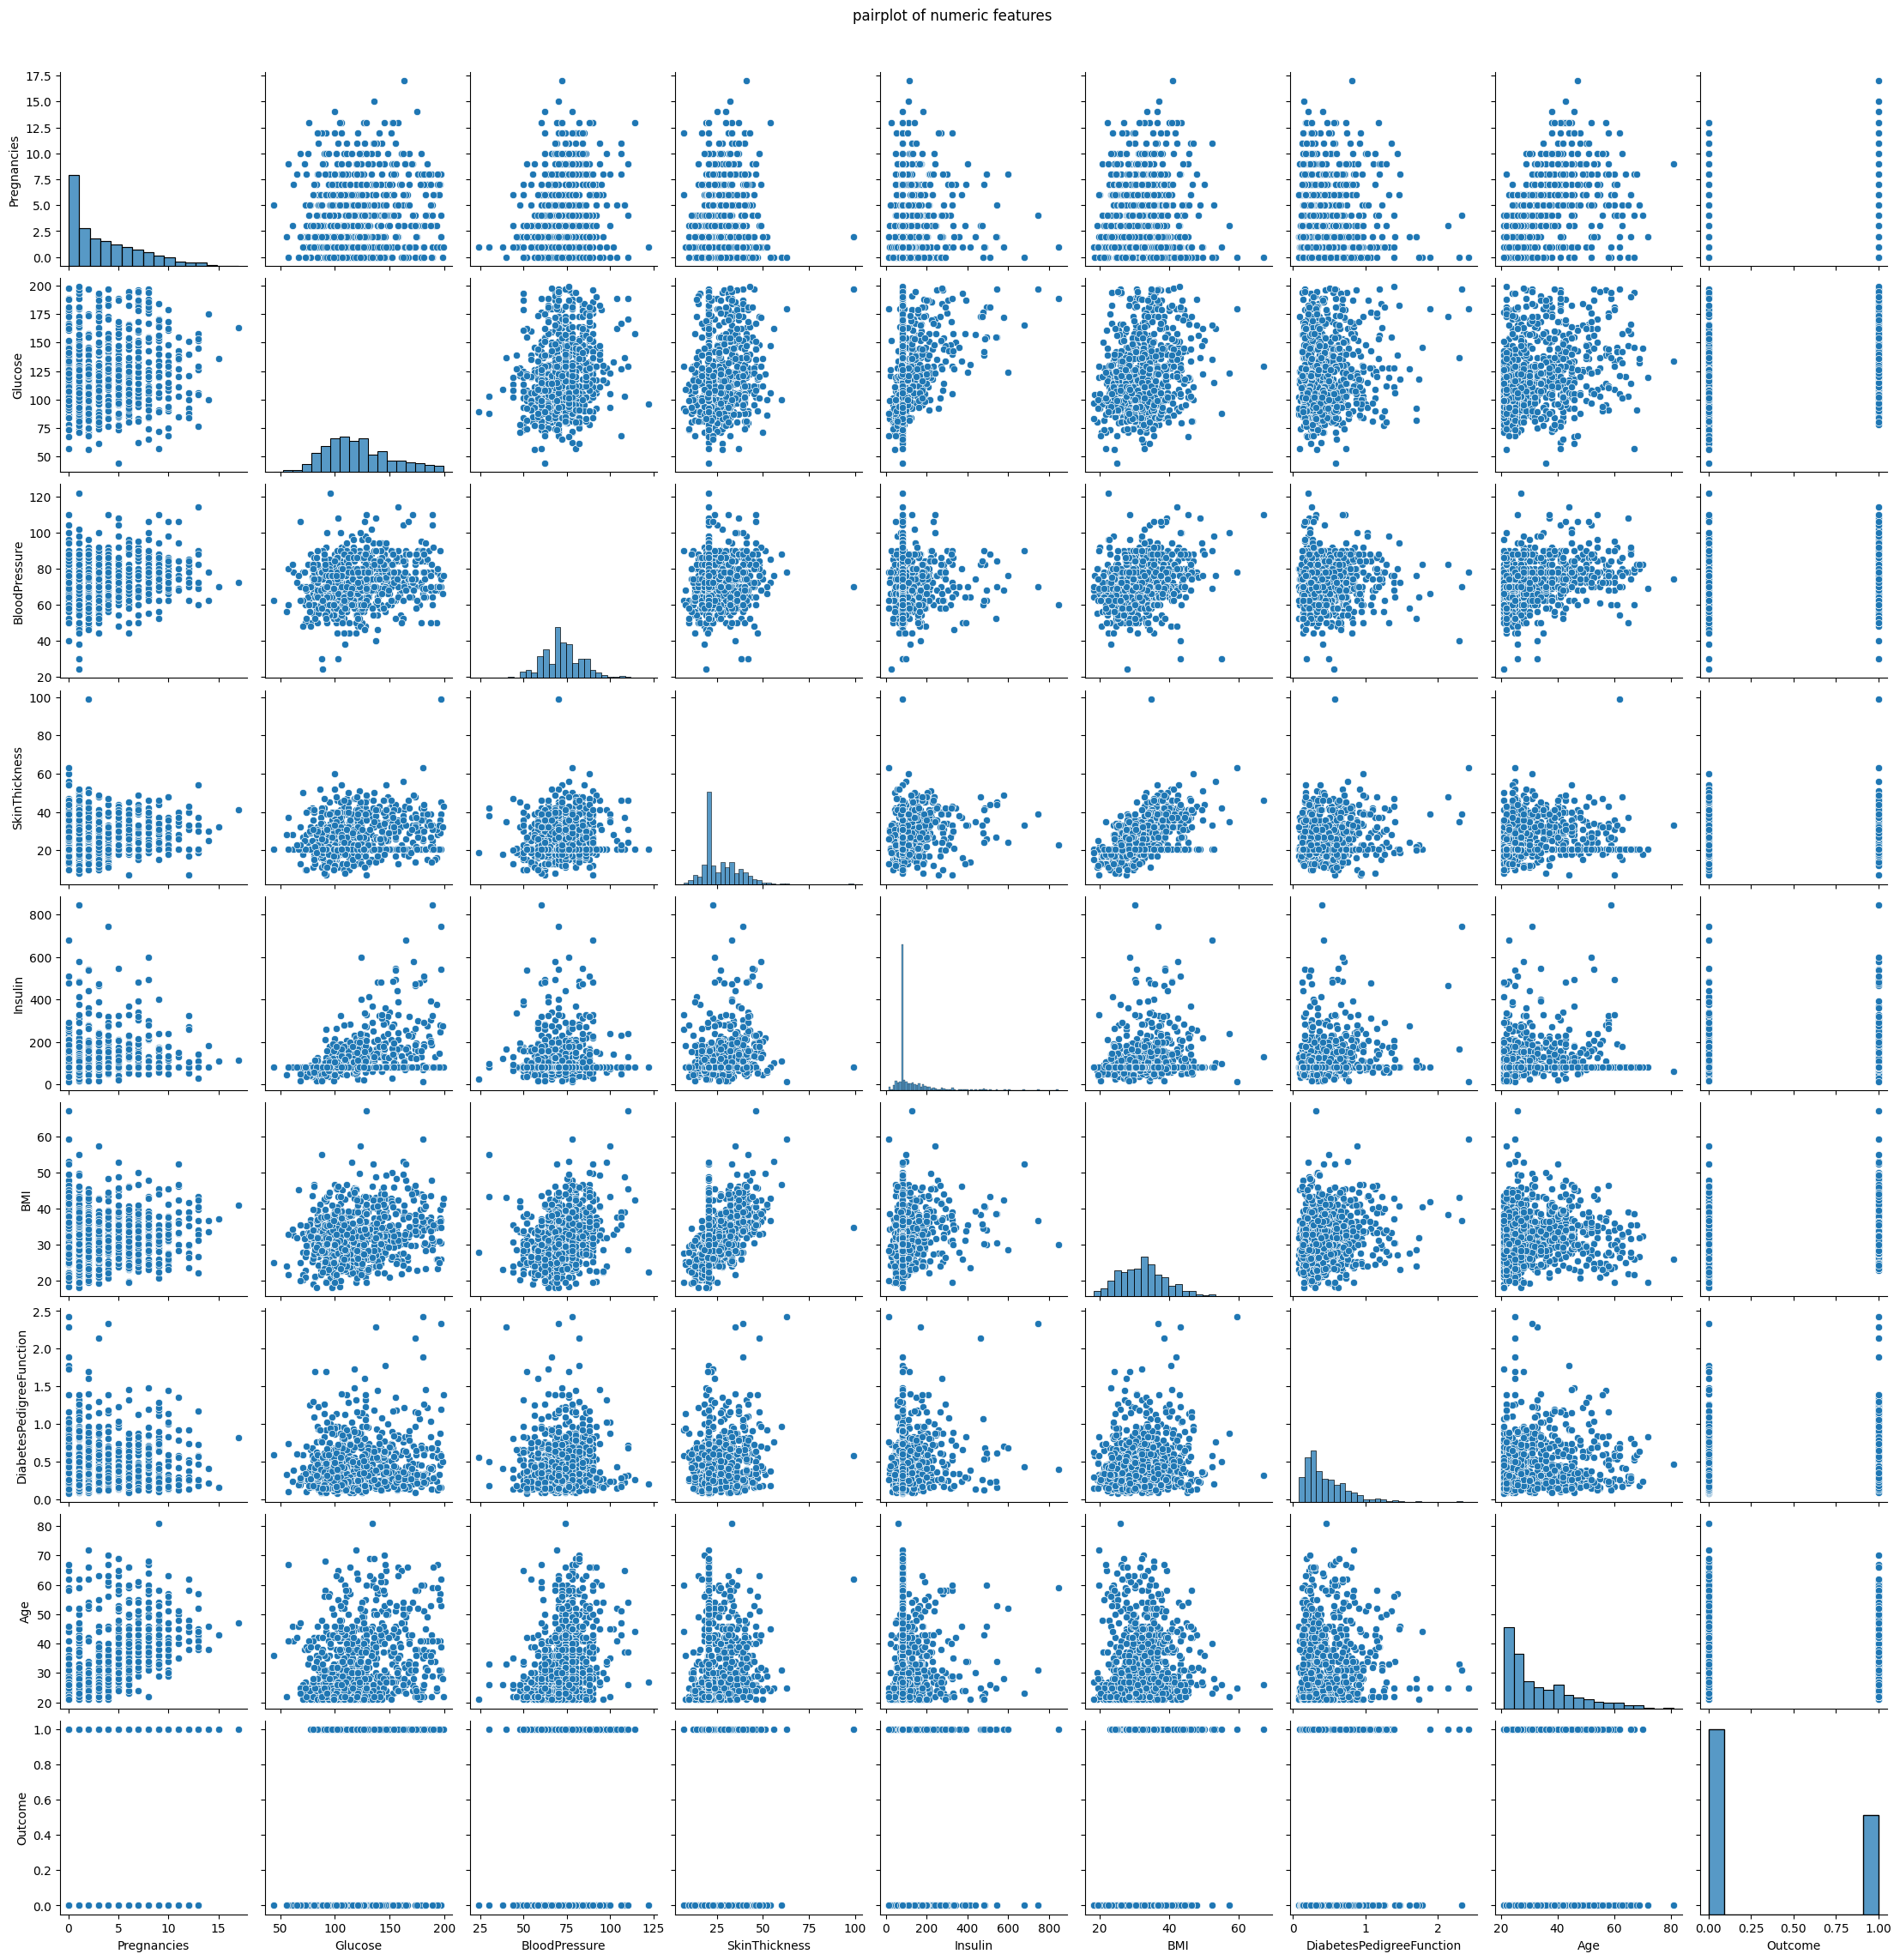

In [38]:
sns.pairplot(data)
plt.suptitle("pairplot of numeric features",y=1.02);
plt.show();
#in diagonal histograms we will get 

### Multi-Variate Analysis
#### Perform correlation analysis.visually explore it using heat map.

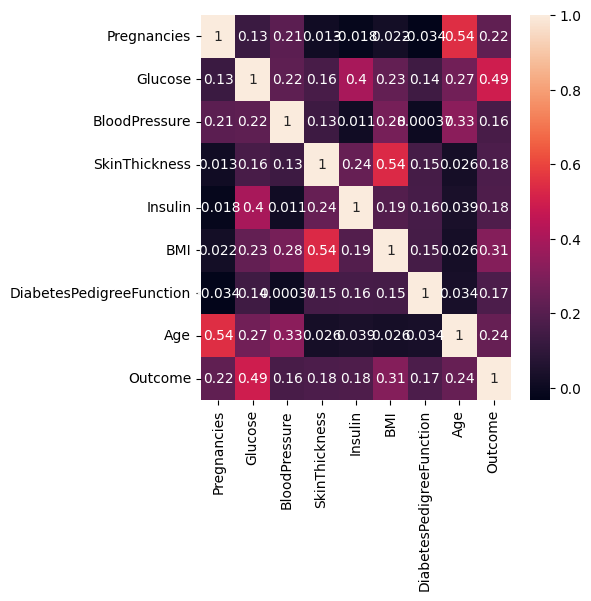

In [96]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

we can see outcome has maximum relation with Glucose and minimum with blood pressure than the other features.

## Data Modelling
1)Devise strategies for model building.It is important to decide right validation framework.

strategies for model building :-
    
    1. Descriptive Analysis :-
        -Identify ID, Input and Target features
        -Identify categorical and numerical features
        -Identify columns with missing values
        
    2. Data Treatment (Missing values treatment) :-
        - Detecting outliers & removing them. 
        - Imputing mean, mode or median value at a place of missing value as per dataset   
        
    3.Feature Extraction / Feature Engineering :-
        -we will remove noisy features from data
        -By the help of correlation / heatmap / differnt types of feature selection techniques.
        
    4.Data is imbalanced
        -For balancing the data we wil use SMOTE over sampling techinque.
        
    5.Building a model :-
        - select a best algorithms for model
        
    6.Train a model
    
    7.Evaluation
        - check a accuracy & mean squared error of model
        
    8.Hyper Parameter Tuning :-
        -for decrese in RMSE check a best parameters for model.
        
    9.Create a clasification report. 

### Feature Selection 

In [40]:
#Data preparation for modeling
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']#y is series now because having only one column
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [41]:
#finding the correlation of every feature with the outcome(target variable)
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [42]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


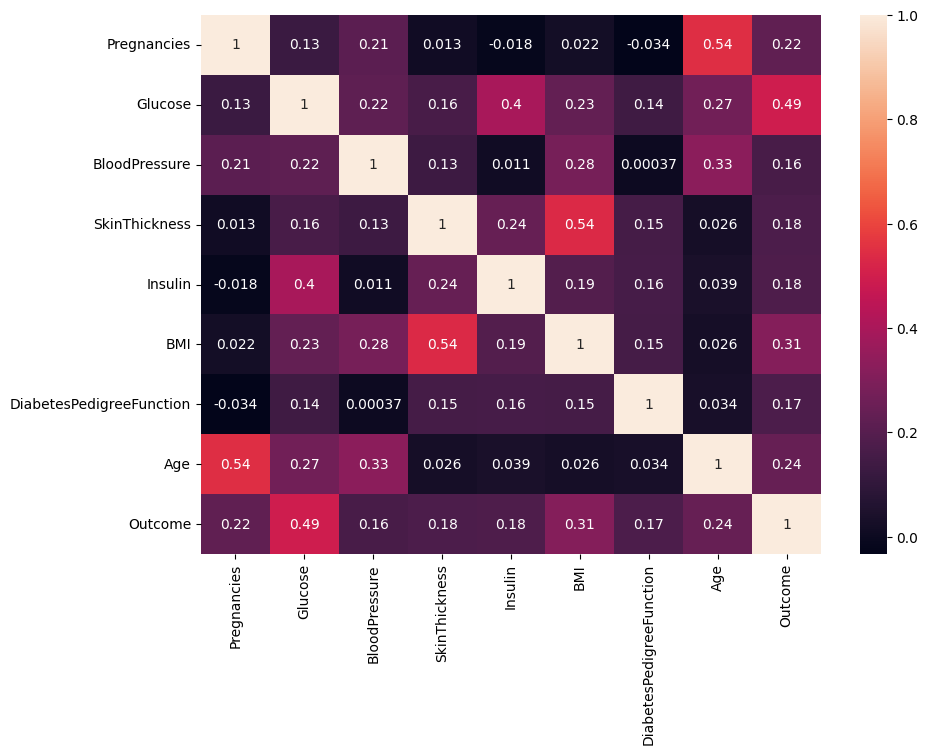

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

1) we can see BloodPressure feature has lowest relation with output column.
2) so we will remove BloodPressure for training a good model with high accuracy.

In [44]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values 
new_y=data.Outcome.values


### SMOTE  to address the class imbalance

#### Train a model

In [45]:
# Train-Test Split for Data Modeling 
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [46]:

print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0))) 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63) 
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


### Applying an appropriate classification algo to build a model

Model 1:Building a logistic regression model

In [47]:
logreg=LogisticRegression(solver='liblinear',random_state=123)

In [48]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [49]:
prediction = logreg.predict(testx)

In [50]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

Accuracy_score - 0.7207792207792207
Mean_squared_error - 0.2792207792207792


In [51]:
logreg.fit(trainx_res,trainy_res)
prediction = logreg.predict(testx)

In [99]:
conf_matrix = confusion_matrix(testy, prediction)
print(conf_matrix)

[[69 26]
 [17 42]]


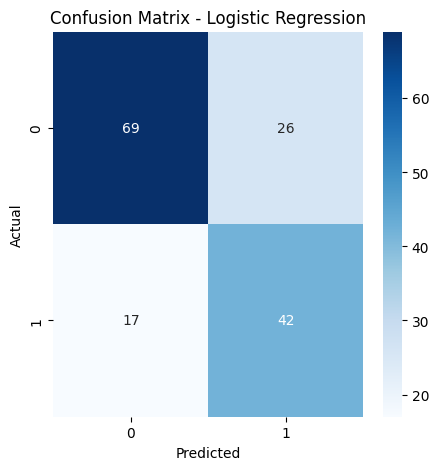

In [97]:
conf_matrix = confusion_matrix(testy, prediction)

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
print(classification_report(testy,prediction))


              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.839


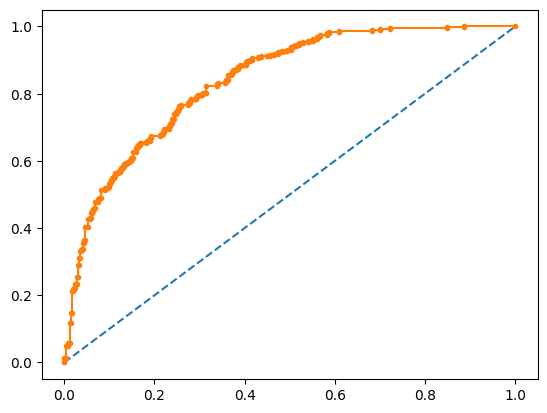

In [54]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
# predict probabilities
probs = logreg.predict_proba(trainx_res) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] # calculate AUC 
auc = roc_auc_score(trainy_res, probs) 
print('AUC: %.3f' % auc) 
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs) 
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model 
plt.plot(fpr, tpr, marker='.')
plt.show()

### Model:2=>Random Forest Classifier

In [55]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [56]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [57]:
rf_predict=rf.predict(testx)

In [58]:
print('Accuracy_score -',accuracy_score(testy,rf_predict)) 
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7597402597402597
Mean_squared_error - 0.24025974025974026


### RandomForestClassifier(Hyper Parameter Tunning)

In [59]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3], 'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [60]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [61]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3, n_estimators= 400,random_state=42)



In [62]:
rf_grid.fit(trainx_res,trainy_res)



RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [63]:
rf_grid_predict=rf_grid.predict(testx)



In [64]:
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict)) 
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))




Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [65]:
print((confusion_matrix(testy,prediction)))



[[69 26]
 [17 42]]


In [66]:
print(classification_report(testy,prediction))




              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.939


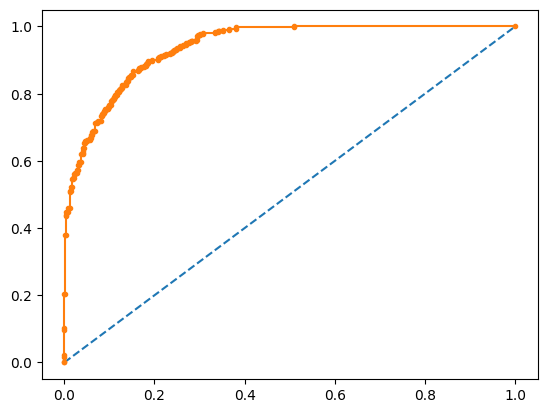

In [67]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
# predict probabilities 
probs = rf.predict_proba(trainx_res) 
# keep probabilities for the positive outcome only 
probs = probs[:, 1] 
# calculate AUC 
auc = roc_auc_score(trainy_res, probs) 
print('AUC: %.3f' % auc) 
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs) 
# plot no skill 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.') 
plt.show()

### Model:3 Decision tree classifier

In [68]:
dc=DecisionTreeClassifier(random_state=42)

dc.fit(trainx_res,trainy_res)

dc_pred=dc.predict(testx)

print('Accuracy_score -',accuracy_score(testy,dc_pred)) 
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664


#### Decision Tree Classifier (Hyper Parameter Tunning)

In [69]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3], 'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [70]:
import warnings 
warnings.filterwarnings('ignore') 
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2) 
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [71]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [72]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1, min_samples_split= 2,splitter='best',random_state=42)

In [73]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [74]:

print('Accuracy_score -',accuracy_score(testy,dc_final_pred)) 
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))


Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117


In [75]:
print((confusion_matrix(testy,dc_final_pred)))


[[73 22]
 [26 33]]


In [76]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.792


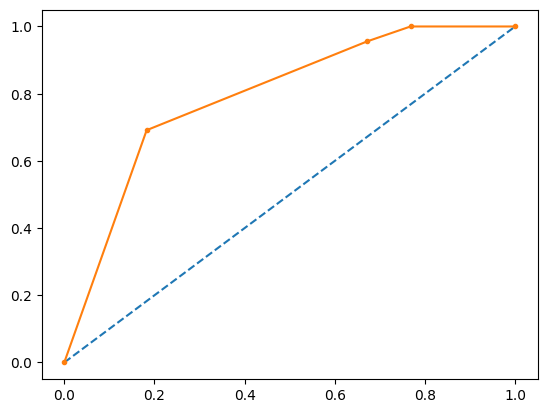

In [77]:
#preparing ROC curve (Receiver Operating Characteristics Curve)
probs=dc_final.predict_proba(trainx_res)
probs=probs[:,1]
auc=roc_auc_score(trainy_res,probs)
print('AUC: %.3f' %auc)
fpr,tpr,thresholds=roc_curve(trainy_res,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### Model 4 :KNN

In [78]:
knn=KNeighborsClassifier(n_neighbors=4)

In [79]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [80]:
knn_pred=knn.predict(testx)

In [81]:
print('Accuracy_score -',accuracy_score(testy,knn_pred)) 
print('Mean_squared_error -',mean_squared_error(testy,knn_pred))

Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664


In [82]:
print((confusion_matrix(testy,knn_pred)))

[[68 27]
 [31 28]]


In [83]:
print((classification_report(testy,knn_pred)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC: 0.951


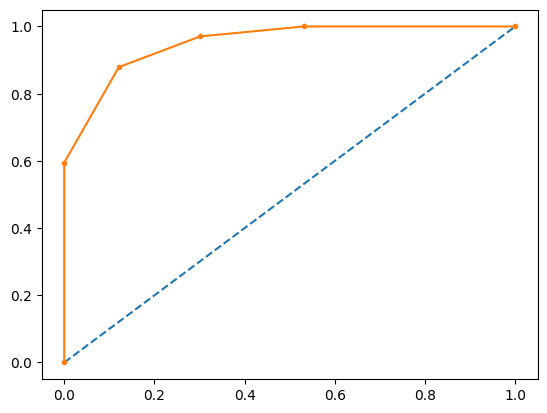

In [84]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
# predict probabilities 
probs = knn.predict_proba(trainx_res) 

# keep probabilities for the positive outcome only
probs = probs[:, 1] 
# calculate AUC
auc = roc_auc_score(trainy_res, probs) 
print('AUC: %.3f' % auc) 
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs) 
# plot no skill 
plt.plot([0, 1], [0, 1], linestyle='--') 
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.') 
plt.show()

### Model Accuracy Comparison

In [85]:
Algorithms=['KNN','RandomForest','Decisiontree','logreg']
Accuracy_Score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred),accuracy_score(testy,prediction)]
# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})

In [86]:
# Display the accuracy table
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.623377
1  RandomForest  0.733766
2  Decisiontree  0.688312
3        logreg  0.720779


Inferences from Model Accuracy Comparison
1) RandomForest Performs Well:

Among the algorithms tested, RandomForest exhibits the highest accuracy at 73.38%.

2) KNN Shows Lower Accuracy:

KNN has the lowest accuracy among the models, with a score of 62.34%.

3) Consistent Performances:

Decision Tree, SVM, Naive Bayes, and XGBoost show relatively similar accuracies, ranging from 68.83% to 72.08%.

4) Consideration for Model Selection:

The choice of the algorithm depends on various factors, including the specific requirements of the task, interpretability, and computational efficiency.

5) Further Evaluation:

Additional evaluation metrics, such as precision, recall, and F1 score, should be considered for a comprehensive assessment of model performance.


In [87]:
#creating the objects 
logreg_cv = LogisticRegression(solver='liblinear',random_state=123) 
dt_cv=DecisionTreeClassifier(random_state=123) 
knn_cv=KNeighborsClassifier() 
rf_cv=RandomForestClassifier(random_state=123) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Random Forest'} 
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv] 
for i,model in enumerate(cv_models): 
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, trainx, trainy, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7752247488101534
Decision Tree Test Accuracy: 0.7150713907985192
KNN Test Accuracy: 0.724616604970915
Random Forest Test Accuracy: 0.7685880486515072


**Inferences from Model Comparison with KNN Algorithm Results**
1) **Logistic Regression Outperforms:**
Among the models tested, Logistic Regression exhibits the highest test accuracy at 77.68%.

2) **Decisive Model Differences:**

Decision Tree, and Random Forest show lower test accuracies compared to Logistic Regression, ranging from 70.53% to 76.21%.

3) **Consideration for Model Selection:**

Logistic Regression might be preferred choices based on higher test accuracies, but other factors such as interpretability and computational efficiency should be considered.

4) **Cross-Validation Insights:**

The use of cross-validation provides a robust estimate of model performance, reducing the impact of data partitioning on results.

5) **Further Exploration:**

Evaluation metrics beyond accuracy, such as precision, recall, and F1 score, should be considered for a comprehensive understanding of model effectiveness.
